<a href="https://colab.research.google.com/github/Divya7201/Animating-Buttons/blob/main/TestingcodeMajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanikastulaskar","key":"3d8567c83a7c21b1cf44fe84e78e82f3"}'}

In [2]:
!mkdir ~/.kaggle

In [4]:
!pip install -q kaggle

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c ultrasound-nerve-segmentation

100% 2.10G/2.11G [00:27<00:00, 122MB/s] 
100% 2.11G/2.11G [00:27<00:00, 81.8MB/s]


In [6]:
import pandas as pd
# Assuming the file is in 'ultrasound-nerve-segmentation.zip', unzip it
!unzip ultrasound-nerve-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

In [7]:
# !pip install tensorflow keras opencv-python albumentations matplotlib
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive to access your dataset

Mounted at /content/drive


In [ ]:
# import os
# import re
# train_path = os.listdir('/content/train/')
# test_path = os.listdir('/content/test/')

# print(len(train_path) , len(test_path))

In [8]:
import pandas as pd
import os # Importing the os module
import re # Importing the re module

#creating train and test dataframes of images
file_path=pd.DataFrame({'image_path':os.listdir('/content/train')})
file_path_test=pd.DataFrame({'image_path':os.listdir('/content/test')})

#getting subject and image name from train data
subject=file_path.image_path.apply(lambda x:re.split('_',x)[0])
img_name=file_path_test.image_path.apply(lambda x:x.split('.')[0])
grb=file_path.image_path.apply(lambda x:re.search('_[0-9]+',x).group())
image_name=grb.apply(lambda x:re.split('_',x)[1])

#adding two columns image name and subject name
file_path['image_name']=image_name
file_path['subject_name']=subject
file_path_test['image_name']=img_name

#adding file location to file name.
file_path.image_path=file_path.image_path.apply(lambda x:'train/'+x)
file_path_test.image_path=file_path_test.image_path.apply(lambda x:'test/'+x)

#separating mask images from train images
msk=[i for i in range(len(file_path.image_path)) if 'mask' in file_path.image_path[i]]
img=[i for i in range(len(file_path.image_path)) if 'mask' not in file_path.image_path[i]]
msk=file_path.loc[msk]
img=file_path.loc[img]

#aligning both to be concatenated later
msk=msk.sort_values(by=['image_name','subject_name'])
img=img.sort_values(by=['image_name','subject_name'])

#adding mask image path to the df
img['mask_path']=msk.image_path.values

#creating train and test dataframes of images
file_path=pd.DataFrame({'image_path':os.listdir('/content/train')})
file_path_test=pd.DataFrame({'image_path':os.listdir('/content/test')})
#getting subject and image name from train data
subject=file_path.image_path.apply(lambda x:re.split('_',x)[0])
img_name=file_path_test.image_path.apply(lambda x:x.split('.')[0])
grb=file_path.image_path.apply(lambda x:re.search('_[0-9]+',x).group())
image_name=grb.apply(lambda x:re.split('_',x)[1])

#adding two columns image name and subject name
file_path['image_name']=image_name
file_path['subject_name']=subject
file_path_test['image_name']=img_name

#adding file location to file name.
file_path.image_path=file_path.image_path.apply(lambda x:'train/'+x)
file_path_test.image_path=file_path_test.image_path.apply(lambda x:'test/'+x)

#separating mask images from train images
msk=[i for i in range(len(file_path.image_path)) if 'mask' in file_path.image_path[i]]
img=[i for i in range(len(file_path.image_path)) if 'mask' not in file_path.image_path[i]]
msk=file_path.loc[msk]
img=file_path.loc[img]

#aligning both to be concatenated later
msk=msk.sort_values(by=['image_name','subject_name'])
img=img.sort_values(by=['image_name','subject_name'])

#adding mask image path to the df
img['mask_path']=msk.image_path.values
img.head()

,image_path,image_name,subject_name,mask_path
1470,train/1_1.tif,1,1,train/1_1_mask.tif
8999,train/10_1.tif,1,10,train/10_1_mask.tif
4299,train/11_1.tif,1,11,train/11_1_mask.tif
8144,train/12_1.tif,1,12,train/12_1_mask.tif
6741,train/13_1.tif,1,13,train/13_1_mask.tif


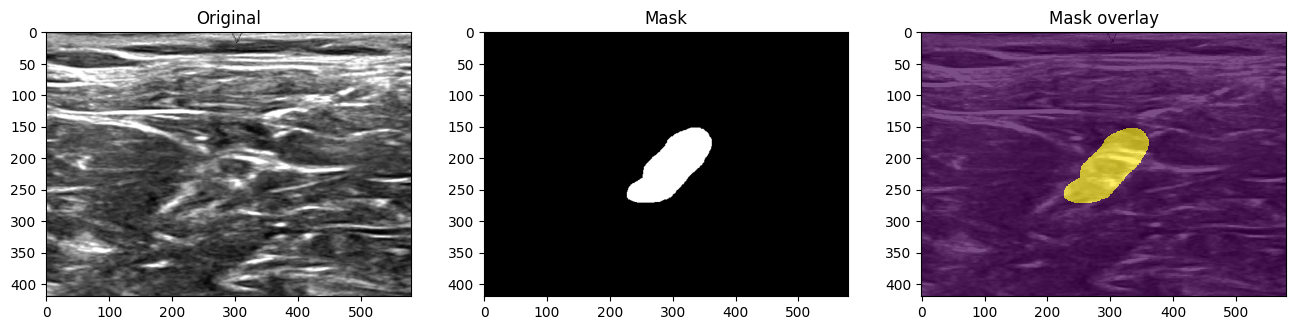

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
#visualising a single ultrasound image and its mask
img_arr=np.array(Image.open(img.iloc[5].image_path))
image1_mask = np.array(Image.open(img.iloc[5].mask_path))
fig, ax = plt.subplots(1,3,figsize = (16,12))
ax[0].imshow(img_arr, cmap = 'gray')
ax[0].set_title('Original')

ax[1].imshow(image1_mask, cmap = 'gray')
ax[1].set_title('Mask')
ax[2].imshow(img_arr, cmap = 'gray', interpolation = 'none')
ax[2].imshow(image1_mask, interpolation = 'none', alpha = 0.7)
ax[2].set_title('Mask overlay')
plt.show()

In [9]:
import numpy as np
import cv2
from skimage.transform import resize
#creating an array that will store all images in 64*64 resized format
X1 = np.zeros((len(img), 64, 64), dtype=np.float32)
for i in range(len(img)):
  img1=cv2.imread(img.image_path.iloc[i],cv2.IMREAD_GRAYSCALE)
  img1=resize(img1, (64,64), mode = 'constant', preserve_range = True)
  X1[i]=img1

In [13]:
!pip install scikit-image imagehash
from tqdm import tqdm
from skimage.metrics import structural_similarity as ssim
from joblib import Parallel, delayed
import imagehash
from PIL import Image
import numpy as np

# Compute perceptual hashes for all images
hashes = [imagehash.average_hash(Image.fromarray(img)) for img in X1]

# Precompute data range for SSIM
data_range = X1.max() - X1.min()

# Function to compute SSIM for pairs
def compute_ssim(i, j):
    simil = ssim(X1[i], X1[j], data_range=data_range)
    if abs(simil) > 0.99:
        return (i, j, simil)
    return None

# Filter pairs based on hash similarity
hash_threshold = 5  # Adjust this threshold based on the dataset
candidate_pairs = [
    (i, j)
    for i in range(len(hashes))
    for j in range(i + 1, len(hashes))
    if abs(hashes[i] - hashes[j]) <= hash_threshold
]

# Parallel computation of SSIM for filtered pairs
results = Parallel(n_jobs=-1)(
    delayed(compute_ssim)(i, j) for i, j in tqdm(candidate_pairs)
)

# Collect results in a dictionary, ignoring None values
sim = {
    (i, j): simil for result in results if result is not None for i, j, simil in [result]
}

# Print a summary
print(f"Found {len(sim)} similar image pairs.")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.1 MB/s eta 0:00:00


100%|██████████| 36566/36566 [00:21<00:00, 1671.54it/s]


Found 1272 similar image pairs.


In [14]:
#storing conflicting images' keys in a list if their similarity is >0.99 in their resized form
conf=[]
for i in tqdm(sim.keys()):
  if sim[i]>0.99:
    msk1=cv2.imread(img.mask_path.iloc[i[0]],cv2.IMREAD_GRAYSCALE)
    msk2=cv2.imread(img.mask_path.iloc[i[1]],cv2.IMREAD_GRAYSCALE)
    if msk1.any()!=msk2.any():
      conf.append(i)

100%|██████████| 1272/1272 [00:07<00:00, 175.66it/s]


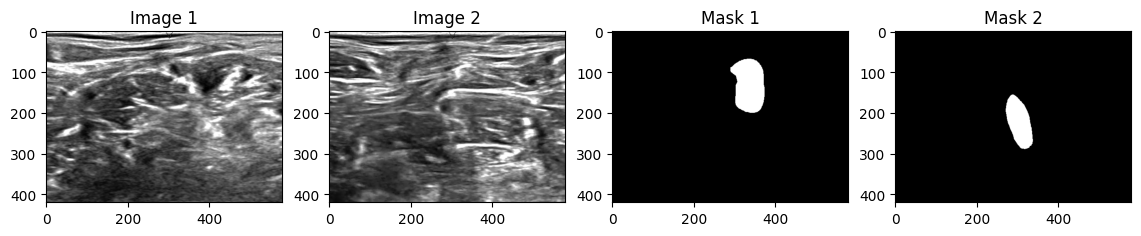

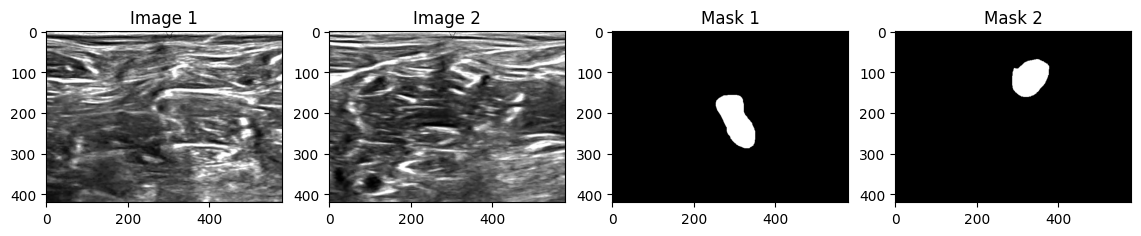

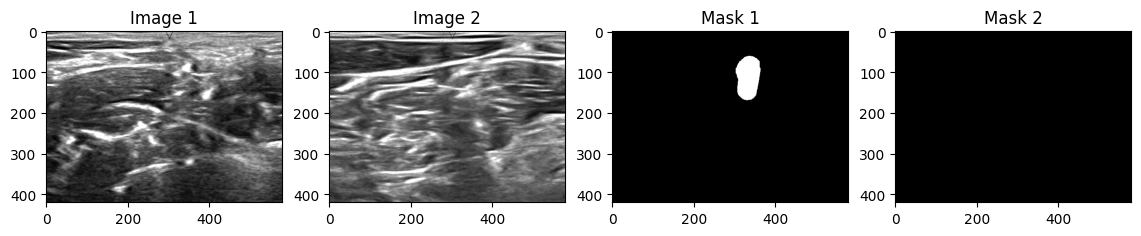

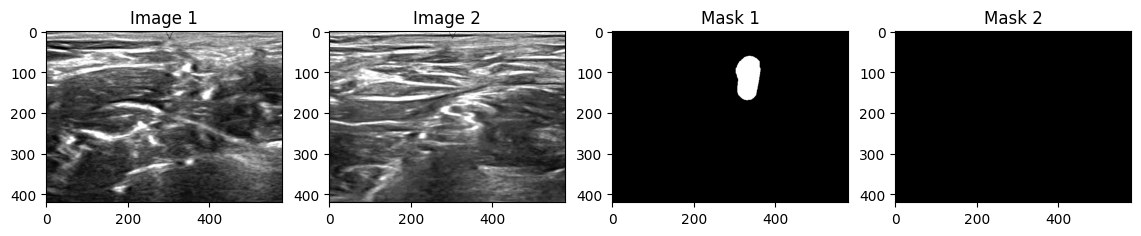

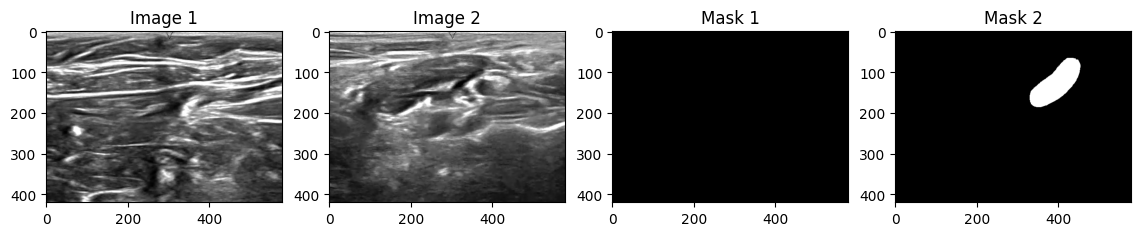

In [16]:
#plotting few of the conflicting image and mask pairs
cnt=0
for i in conf:
  fig,ax=plt.subplots(1,4,figsize=(14,7))
  cnt+=1
  img1=cv2.imread(img.image_path.iloc[i[0]],cv2.IMREAD_GRAYSCALE)
  ax[0].imshow(img1,cmap='gray')
  ax[0].set_title('Image 1')
  img2=cv2.imread(img.image_path.iloc[i[1]],cv2.IMREAD_GRAYSCALE)
  ax[1].imshow(img2,cmap='gray')
  ax[1].set_title('Image 2')
  msk1=cv2.imread(img.mask_path.iloc[i[0]],cv2.IMREAD_GRAYSCALE)
  ax[2].imshow(msk1,cmap='gray')
  ax[2].set_title('Mask 1')
  msk2=cv2.imread(img.mask_path.iloc[i[1]],cv2.IMREAD_GRAYSCALE)
  ax[3].imshow(msk2,cmap='gray')
  ax[3].set_title('Mask 2')
  if cnt==5:
    break

In [15]:
#out of conflicting image pair dropping the image that doesn't contains a mask
indices=[img.iloc[i[1]].name if cv2.imread(img.mask_path.iloc[i[0]],
                                           cv2.IMREAD_GRAYSCALE).any()==True else img.iloc[i[0]].name for i in conf]
indices=list(set(indices))
img.drop(indices,axis=0,inplace=True)

In [17]:
img.to_csv('dup_rem.csv')

# modelling
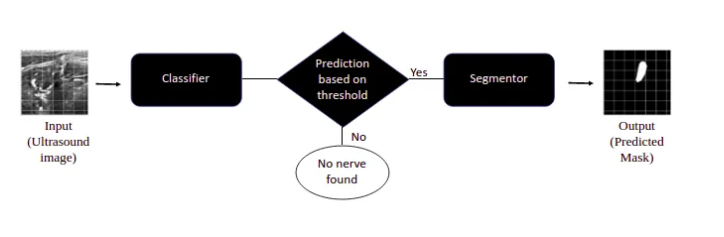

In [19]:
#loading the dataframe containing images after removing conflicting images
df=pd.read_csv('/content/train_masks.csv')
img=pd.read_csv('/content/dup_rem.csv')
img.drop('Unnamed: 0',axis=1,inplace=True)
img.image_name=img.image_name.astype(int)
img.subject_name=img.subject_name.astype(int)
img.columns=['image_path','img','subject','mask_path']
new_df=pd.merge(img,df,on=['img','subject'])
new_df.pixels.fillna(0,inplace=True)
val=[0 if i==0 else 1 for i in new_df.pixels]
new_df['mask_pres']=val

<ipython-input-19-eb592d4002ed>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df.pixels.fillna(0,inplace=True)


In [31]:
def cnn_generator(images, labels, is_training, batch_size=64):
    '''Construct a data generator using tf.Dataset'''

    def parse_function(filename,labels):
        #reading path
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tfio.experimental.image.decode_tiff(image_string)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)

        image = tf.image.resize(image, [im_height, im_width])
        return image,labels

    def flip_lr(image,labels):

        image = tf.image.flip_left_right(image)

        return image,labels
    def flip_ud(image,labels):

        image = tf.image.flip_up_down(image)

        return image,labels
    def rotate(image,labels):
        val=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
        return tf.image.rot90(image, val),labels


    dataset = tf.data.Dataset.from_tensor_slices((images,labels))

    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))
    # augmentations = [flip,rotate]

    if is_training:
      if np.random.uniform(0,1)<0.1:
          dataset = dataset.map(flip_lr)
      elif np.random.uniform(0,1)<0.2:
          dataset = dataset.map(flip_ud)
      elif np.random.uniform(0,1)<0.3:
          dataset = dataset.map(rotate)
    dataset = dataset.repeat()

    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [24]:
!pip install scikit-learn # installing the required library that contains train_test_split function
from sklearn.model_selection import train_test_split # Importing the train_test_split function from the module

X_train, X_valid, y_train, y_valid = train_test_split(new_df.image_path, new_df.mask_pres, test_size=0.2, random_state=42) # Now you can use train_test_split

In [32]:
!pip install tensorflow-io
import tensorflow_io as tfio
im_height=128
im_width=128
tf.keras.backend.clear_session()
tr_cnn_generator = cnn_generator(X_train,y_train, is_training=True, batch_size=64)
val_cnn_generator = cnn_generator(X_valid,y_valid, is_training=False, batch_size=64)

In [35]:
import tensorflow as tf
from tensorflow import keras
# Import Model and layers from tensorflow.keras.models and tensorflow.keras.layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout

#using a pretrained network
base_model = keras.applications.InceptionResNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128, 3),
    include_top=False)

In [36]:
base_model.trainable = False

In [37]:
inp=Input((128,128,4))
conv1=Conv2D(filters=3,kernel_size=(3,3),padding='same')(inp)
base_model=base_model(conv1,training=False)
out = Flatten()(base_model)
out = Dense(1024, activation="relu")(out)
out = Dropout(0.5)(out)
out = Dense(1, activation="sigmoid")(out)

In [38]:
model_clf = Model(inputs = inp, outputs = out)

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam # Import Adam from optimizers

from datetime import datetime
# logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_graph=True,write_grads=True)
callbacks = [
    ModelCheckpoint('best_model.keras', verbose=1, save_best_only=True, save_weights_only=False)
    ]
model_clf.compile(optimizer=Adam(learning_rate=1e-8), loss='binary_crossentropy', metrics=['accuracy','AUC'])

In [51]:
model_clf.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 4)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_407 (Conv2D)                  │ (None, 128, 128, 3)         │             111 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_resnet_v2 (Functional)     │ (None, 2, 2, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6144)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       6,292,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,630,352 (231.29 MB)

 Trainable params: 6,293,616 (24.01 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

In [53]:
# result_clf=model_clf.fit(tr_cnn_generator,steps_per_epoch=64,epochs=30,validation_data=val_cnn_generator,validation_steps=64,callbacks=callbacks,initial_epoch=0)

result_clf=model_clf.fit(tr_cnn_generator,steps_per_epoch=1,epochs=1,validation_data=val_cnn_generator,validation_steps=64,callbacks=callbacks,initial_epoch=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - AUC: 0.4263 - accuracy: 0.4531 - loss: 0.8729
Epoch 1: val_loss improved from inf to 0.82938, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 423s 423s/step - AUC: 0.4263 - accuracy: 0.4531 - loss: 0.8729 - val_AUC: 0.5192 - val_accuracy: 0.4293 - val_loss: 0.8294


In [56]:
# Load a model saved in .keras format
model = tf.keras.models.load_model('best_model.keras')  # Replace with your .keras file path

# Save the model as an .h5 file
model.save('best_model.h5', save_format='h5')  # Save in HDF5 format

model_clf.load_weights('best_model.h5')

In [57]:
def classifier_generator(images):
    '''Data generator for inference phase'''
    image_string=tf.io.read_file(images)
    image = tfio.experimental.image.decode_tiff(image_string)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image

prediction

In [59]:
import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split, KFold
import tensorflow_io as tfio
import keras
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate,Dropout
from tensorflow.keras.layers import Multiply, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [58]:
#generating predictions on train and validation set
X_tr=np.zeros((len(X_train),128,128,4))
X_val=np.zeros((len(X_valid),128,128,4))
for i in range(len(X_train)):
  X_tr[i]=classifier_generator(X_train.iloc[i])
for i in range(len(X_valid)):
  X_val[i]=classifier_generator(X_valid.iloc[i])
pred_clf_tr=model_clf.predict(X_tr)
pred_clf_val=model_clf.predict(X_val)

137/137 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step


In [60]:
#using a default thresold of 0.5 for prediction
pred_clf_val=(np.array(pred_clf_val)>0.5)
pred_clf_tr=(np.array(pred_clf_tr)>0.5)

In [61]:
def Heatmapgen(x):
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea referred from here
  group_names = ['True -ve','False +ve','False -ve','True +ve']
  group_counts = ['{0:0.0f}'.format(value) for value in x.flatten()]
  labels = [f'{v1}\n{v2}' for v1, v2 in
  zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(x, annot=labels, fmt='', cmap='RdBu')

getting number of false positives and negatives

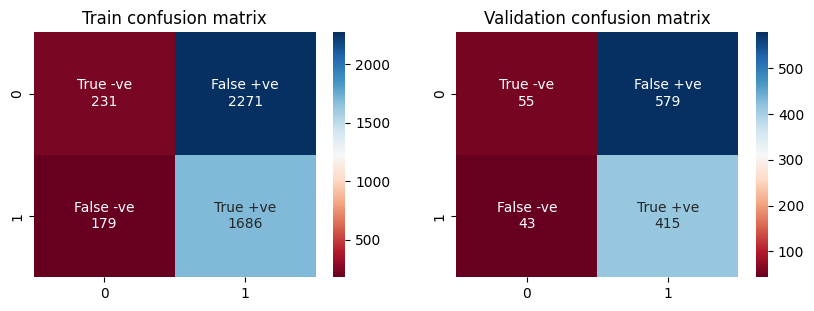

In [63]:
#generating the confusion matrix
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
cf_matr1=confusion_matrix(y_train,pred_clf_tr)
plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)
cf_matr2=confusion_matrix(y_valid,pred_clf_val)
plt.title('Validation confusion matrix')
Heatmapgen(cf_matr2)

In [64]:
#storing the predictions in a list
pred_clf_val=[i[0] for i in pred_clf_val]
pred_clf_tr=[i[0] for i in pred_clf_tr]

oversampling missclassified points

In [66]:
#getting the misclassified data points
wrng_pred=np.where(pred_clf_tr!=y_train,1,0)
#getting the indices..
wrng_pred=np.argwhere(wrng_pred)
wrng_pred=[i[0] for i in wrng_pred]
#out of misclassified datapoints randomly sampling 500 data points
smpl=random.sample(wrng_pred,500)
X_tr_smp=X_train.iloc[smpl]
y_tr_smp=y_train.iloc[smpl]
#oversampling the train set with misclassified datapoints
# Use pd.concat instead of append
X_train_new=pd.concat([X_train, X_tr_smp], ignore_index=True)  #ignore_index=True to reset the index
y_train_new=pd.concat([y_train, y_tr_smp], ignore_index=True) #ignore_index=True to reset the index

In [ ]:
import numpy as np
im_height=128
im_width=128
tf.keras.backend.clear_session()
tr_cnn_generator = cnn_generator(X_train_new,y_train_new, is_training=True, batch_size=64)
val_cnn_generator = cnn_generator(X_valid,y_valid, is_training=False, batch_size=64)

retraining the model with oversampled data

In [71]:
#retraining the model with oversampled data
# result_clf=model_clf.fit(tr_cnn_generator,steps_per_epoch=64,epochs=20,validation_data=val_cnn_generator,validation_steps=64,callbacks=callbacks,initial_epoch=10)
result_clf=model_clf.fit(tr_cnn_generator,steps_per_epoch=1,epochs=1,validation_data=val_cnn_generator,validation_steps=1,callbacks=callbacks,initial_epoch=10)

In [72]:
#getting predictions using new model
X_tr=np.zeros((len(X_train),128,128,4))
X_val=np.zeros((len(X_valid),128,128,4))
for i in range(len(X_train)):
  X_tr[i]=classifier_generator(X_train.iloc[i])
for i in range(len(X_valid)):
  X_val[i]=classifier_generator(X_valid.iloc[i])
pred_clf_tr=model_clf.predict(X_tr)
pred_clf_val=model_clf.predict(X_val)

137/137 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step


In [80]:
# Convert predictions to binary using a threshold (e.g., 0.5)
pred_clf_tr_binary = (pred_clf_tr > 0.5).astype(int)
pred_clf_val_binary = (pred_clf_val > 0.5).astype(int)


In [73]:
#finding the best threshold on the newly trained model
#for this we calculate both the false positives and false negatives in the predictions
fp_arr_tr=[]
fn_arr_tr=[]
fp_arr_val=[]
fn_arr_val=[]
thresholds=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
for i in thresholds:
  pred_clf_val_=(np.array(pred_clf_val)>i)
  pred_clf_tr_=(np.array(pred_clf_tr)>i)
  cf_matr1=confusion_matrix(y_train,pred_clf_tr_)
  cf_matr2=confusion_matrix(y_valid,pred_clf_val_)
  fp_arr_tr.append(cf_matr1[0][1])
  fn_arr_tr.append(cf_matr1[1][0])
  fp_arr_val.append(cf_matr2[0][1])
  fn_arr_val.append(cf_matr2[1][0])

Trying various thresholds


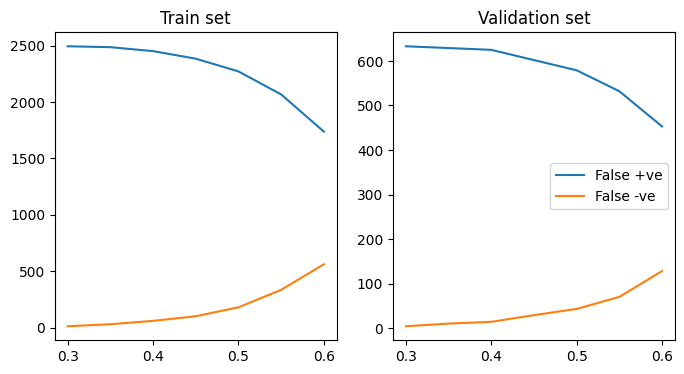

In [79]:
#plotting the fp and fn in train and validation set
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].set_title('Train set')
ax[0].plot(thresholds,fp_arr_tr,label='False +ve')
ax[0].plot(thresholds,fn_arr_tr,label='False -ve')
ax[1].set_title('Validation set')
ax[1].plot(thresholds,fp_arr_val,label='False +ve')
ax[1].plot(thresholds,fn_arr_val,label='False -ve')
plt.legend()
plt.show()

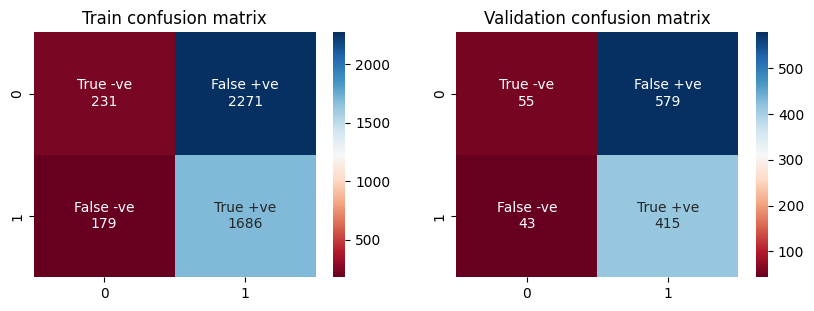

In [82]:
# ipython-input-81-cebd8bc4f02f
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#0.5
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)

# Convert predictions to binary using a threshold (e.g., 0.5)
pred_clf_tr_binary = (pred_clf_tr > 0.5).astype(int)
cf_matr1=confusion_matrix(y_train,pred_clf_tr_binary) # Use binary predictions

plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)

# Convert predictions to binary using a threshold (e.g., 0.5)
pred_clf_val_binary = (pred_clf_val > 0.5).astype(int)
cf_matr2=confusion_matrix(y_valid,pred_clf_val_binary) # Use binary predictions

plt.title('Validation confusion matrix')
Heatmapgen(cf_matr2)

Nerve segmentor

In [88]:
import os
os.chdir('/usr/local/lib/python3.11/dist-packages/efficientnet/')
!sed -i 's/keras.utils.generic_utils.get_custom_objects().update/keras.utils.get_custom_objects().update/g' __init__.py

In [90]:
!pip install -U segmentation_models # Install the segmentation_models library
# from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
import tensorflow
import keras
import cv2
import imgaug.augmenters as iaa
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
# import segmentation_models as sm
# from segmentation_models.metrics import iou_score
# from segmentation_models import Unet
# focal_loss = sm.losses.cce_dice_loss
import random
# import segmentation_models as sm
# from segmentation_models import Unet
# sm.set_framework('tf.keras')
tf.keras.backend.set_image_data_format('channels_last')

In [87]:
img=pd.read_csv('/content/dup_rem.csv')
df=pd.read_csv('/content/train_masks.csv')
img.drop('Unnamed: 0',axis=1,inplace=True)
img.image_name=img.image_name.astype(int)
img.subject_name=img.subject_name.astype(int)
img.columns=['image_path','img','subject','mask_path']
new_df=pd.merge(img,df,on=['img','subject'])
new_df.pixels.fillna(0,inplace=True)
val=[0 if i==0 else 1 for i in new_df.pixels]
new_df['mask_pres']=val

<ipython-input-87-7d459eaef25c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df.pixels.fillna(0,inplace=True)


In [91]:
pos_df=new_df[new_df.mask_pres==1]

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(pos_df.image_path, pos_df.mask_path, test_size=0.2, random_state=42)

In [93]:
im_height=128
im_width=128

In [94]:
def atrous_block(input):
  '''Implement DAC block as given in paper'''
  q1=Conv2D(filters=512,kernel_size=(3,3),padding='same',strides=1,name='atr0',dilation_rate=1,activation='relu')(input)
  q2=Conv2D(filters=512,kernel_size=(3,3),padding='same',strides=1,name='atr1',dilation_rate=2,activation='relu')(input)
  q2=Conv2D(filters=512,kernel_size=(1,1),padding='same',strides=1,name='atr2',dilation_rate=1,activation='relu')(q2)
  q3=Conv2D(filters=512,kernel_size=(3,3),padding='same',strides=1,name='atr3',dilation_rate=1,activation='relu')(input)
  q3=Conv2D(filters=512,kernel_size=(3,3),padding='same',strides=1,name='atr4',dilation_rate=2,activation='relu')(q3)
  q3=Conv2D(filters=512,kernel_size=(1,1),padding='same',strides=1,name='atr5',dilation_rate=1,activation='relu')(q3)
  q4=Conv2D(filters=512,kernel_size=(3,3),padding='same',strides=1,name='atr6',dilation_rate=1,activation='relu')(input)
  q4=Conv2D(filters=512,kernel_size=(3,3),padding='same',strides=1,name='atr7',dilation_rate=2,activation='relu')(q4)
  q4=Conv2D(filters=512,kernel_size=(3,3),padding='same',strides=1,name='atr8',dilation_rate=4,activation='relu')(q4)
  q4=Conv2D(filters=512,kernel_size=(1,1),padding='same',strides=1,name='atr9',dilation_rate=1,activation='relu')(q4)
  atr_out=concatenate([q1,q2,q3,q4],axis=-1)
  print(atr_out.shape)
  return atr_out

In [95]:
def rmp_block(input):
  '''Implement RMP block as given in paper'''
  X1=MaxPooling2D((2,2),strides=(2,2))(input)
  X1=Conv2DTranspose(512,(2,2),padding='same',activation='relu',strides=(2,2))(X1)
  X2=MaxPooling2D((3,3),strides=(2,2),padding='same')(input)
  X2=Conv2DTranspose(512,(3,3),padding='same',activation='relu',strides=(2,2))(X2)
  X3=MaxPooling2D((5,5),strides=(2,2),padding='same')(input)
  X3=Conv2DTranspose(512,(5,5),padding='same',activation='relu',strides=(2,2))(X3)
  X4=MaxPooling2D((6,6),strides=(2,2),padding='same')(input)
  X4=Conv2DTranspose(512,(6,6),padding='same',activation='relu',strides=(2,2))(X4)
  concat=concatenate([X1,X2,X3,X4],axis=-1)
  return concat

In [96]:
def convolutional_block(input, filters=3, kernel_size=3, batchnorm = True):
    #conv layer followed by batchnormalization
    x = Conv2D(filters = filters, kernel_size = (kernel_size, kernel_size),
               kernel_initializer = 'he_normal', padding = 'same')(input)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = filters, kernel_size = (kernel_size, kernel_size),
               kernel_initializer = 'he_normal', padding = 'same')(input)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [97]:
def resunet_opt(input_img, filters = 64, dropout = 0.2, batchnorm = True):
    """Residual Unet + Dense Atrous convolution + Rmp block"""
    conv1 = convolutional_block(input_img, filters * 1, kernel_size = 3, batchnorm = batchnorm)
    pool1 = MaxPooling2D((2, 2))(conv1)
    drop1 = Dropout(dropout)(pool1)

    conv2 = convolutional_block(drop1, filters * 2, kernel_size = 3, batchnorm = batchnorm)
    pool2 = MaxPooling2D((2, 2))(conv2)
    drop2 = Dropout(dropout)(pool2)

    conv3 = convolutional_block(drop2, filters * 4, kernel_size = 3, batchnorm = batchnorm)
    pool3 = MaxPooling2D((2, 2))(conv3)
    drop3 = Dropout(dropout)(pool3)

    conv4 = convolutional_block(drop3, filters * 8, kernel_size = 3, batchnorm = batchnorm)
    pool4 = MaxPooling2D((2, 2))(conv4)
    drop4 = Dropout(dropout)(pool4)

    conv5 = convolutional_block(drop4, filters = filters * 16, kernel_size = 3, batchnorm = batchnorm)
    #atrous conv or dillated conv is when filter has holes in it.
    conv5=atrous_block(conv5)
    conv5 = convolutional_block(conv5, filters = filters * 16, kernel_size = 3, batchnorm = batchnorm)
    conv5=rmp_block(conv5)
    conv5 = convolutional_block(conv5, filters = filters * 16, kernel_size = 3, batchnorm = batchnorm)

    ups6 = Conv2DTranspose(filters * 8, (3, 3), strides = (2, 2), padding = 'same',activation='relu',kernel_initializer='he_normal')(conv5)
    ups6 = concatenate([ups6, conv4])
    ups6 = Dropout(dropout)(ups6)
    conv6 = convolutional_block(ups6, filters * 8, kernel_size = 3, batchnorm = batchnorm)

    ups7 = Conv2DTranspose(filters * 4, (3, 3), strides = (2, 2), padding = 'same',activation='relu',kernel_initializer='he_normal')(conv6)
    ups7 = concatenate([ups7, conv3])
    ups7 = Dropout(dropout)(ups7)
    conv7 = convolutional_block(ups7, filters * 4, kernel_size = 3, batchnorm = batchnorm)

    ups8 = Conv2DTranspose(filters * 2, (3, 3), strides = (2, 2), padding = 'same',activation='relu',kernel_initializer='he_normal')(conv7)
    ups8 = concatenate([ups8, conv2])
    ups8 = Dropout(dropout)(ups8)
    conv8 = convolutional_block(ups8, filters * 2, kernel_size = 3, batchnorm = batchnorm)

    ups9 = Conv2DTranspose(filters * 1, (3, 3), strides = (2, 2), padding = 'same',activation='relu',kernel_initializer='he_normal')(conv8)
    ups9 = concatenate([ups9, conv1])
    ups9 = Dropout(dropout)(ups9)
    conv9 = convolutional_block(ups9, filters * 1, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(4, (1, 1), activation='sigmoid')(conv9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [98]:
def tfdata_generator(images, maskname, is_training, batch_size=64):
    '''Construct a data generator using tf.Dataset'''

    def parse_function(filename,maskname):
        #reading path
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tfio.experimental.image.decode_tiff(image_string)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)

        image = tf.image.resize(image, [im_height, im_width])

        mask=tf.io.read_file(maskname)
        mask=tfio.experimental.image.decode_tiff(mask)
        mask = tf.image.convert_image_dtype(mask, tf.float32)
        mask = tf.image.resize(mask, [im_height, im_width],method='nearest')
        return image,mask

    def flip_lr(image,labels):

        image = tf.image.flip_left_right(image)
        labels = tf.image.flip_left_right(labels)

        return image,labels
    def flip_ud(image,labels):

        image = tf.image.flip_up_down(image)
        labels = tf.image.flip_up_down(image)

        return image,labels

    def rotate(image,labels):
        val=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
        return tf.image.rot90(image, val),tf.image.rot90(labels,val)


    dataset = tf.data.Dataset.from_tensor_slices((images,maskname))

    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))
    # augmentations = [flip,rotate]

    if is_training:
      if np.random.uniform(0,1)<0.2:
          dataset = dataset.map(flip_lr)
      elif np.random.uniform(0,1)<0.4:
          dataset = dataset.map(flip_ud)
      elif np.random.uniform(0,1)<0.5:
          dataset = dataset.map(rotate)
    dataset = dataset.repeat()

    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [99]:
tf.keras.backend.clear_session()
tr_image_generator = tfdata_generator(X_train,y_train, is_training=True, batch_size=64)
val_image_generator = tfdata_generator(X_valid,y_valid, is_training=False, batch_size=64)

In [124]:
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

# Define log directory for TensorBoard
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Define callbacks
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1, write_graph=True)
callbacks = [
    ModelCheckpoint('/content/best_model.keras', verbose=1, save_best_only=True, save_weights_only=False),
    tensorboard_callback
]


In [125]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/best_model.keras')  # Replace 'model_file.keras' with your .keras file path

# Save the model in .h5 format
model.save('/content/best_model.h5', save_format='h5')  # Replace 'model_file.h5' with your desired file name

In [113]:
import tensorflow as tf
import keras.backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Clip predictions to prevent log(0)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        # Compute the cross-entropy loss
        cross_entropy = -y_true * tf.math.log(y_pred)
        # Compute the focal loss
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        return tf.reduce_mean(weight * cross_entropy)
    return loss


In [116]:
import tensorflow as tf

def iou_score(y_true, y_pred, smooth=1e-6):
    # Flatten the tensors
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    # Calculate intersection and union
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) - intersection
    # Compute IoU
    iou = (intersection + smooth) / (union + smooth)
    return iou


In [117]:
# Define image dimensions
im_height = 128
im_width = 128

# Define input tensor
input_img = Input((im_height, im_width, 4), name='img')

# Create model
model = resunet_opt(input_img, filters=16, dropout=0.4, batchnorm=True)

# Compile model with focal loss and IoU score as metrics
model.compile(optimizer=Adam(learning_rate=1e-5), loss=focal_loss(), metrics=[iou_score])


(None, 8, 8, 2048)


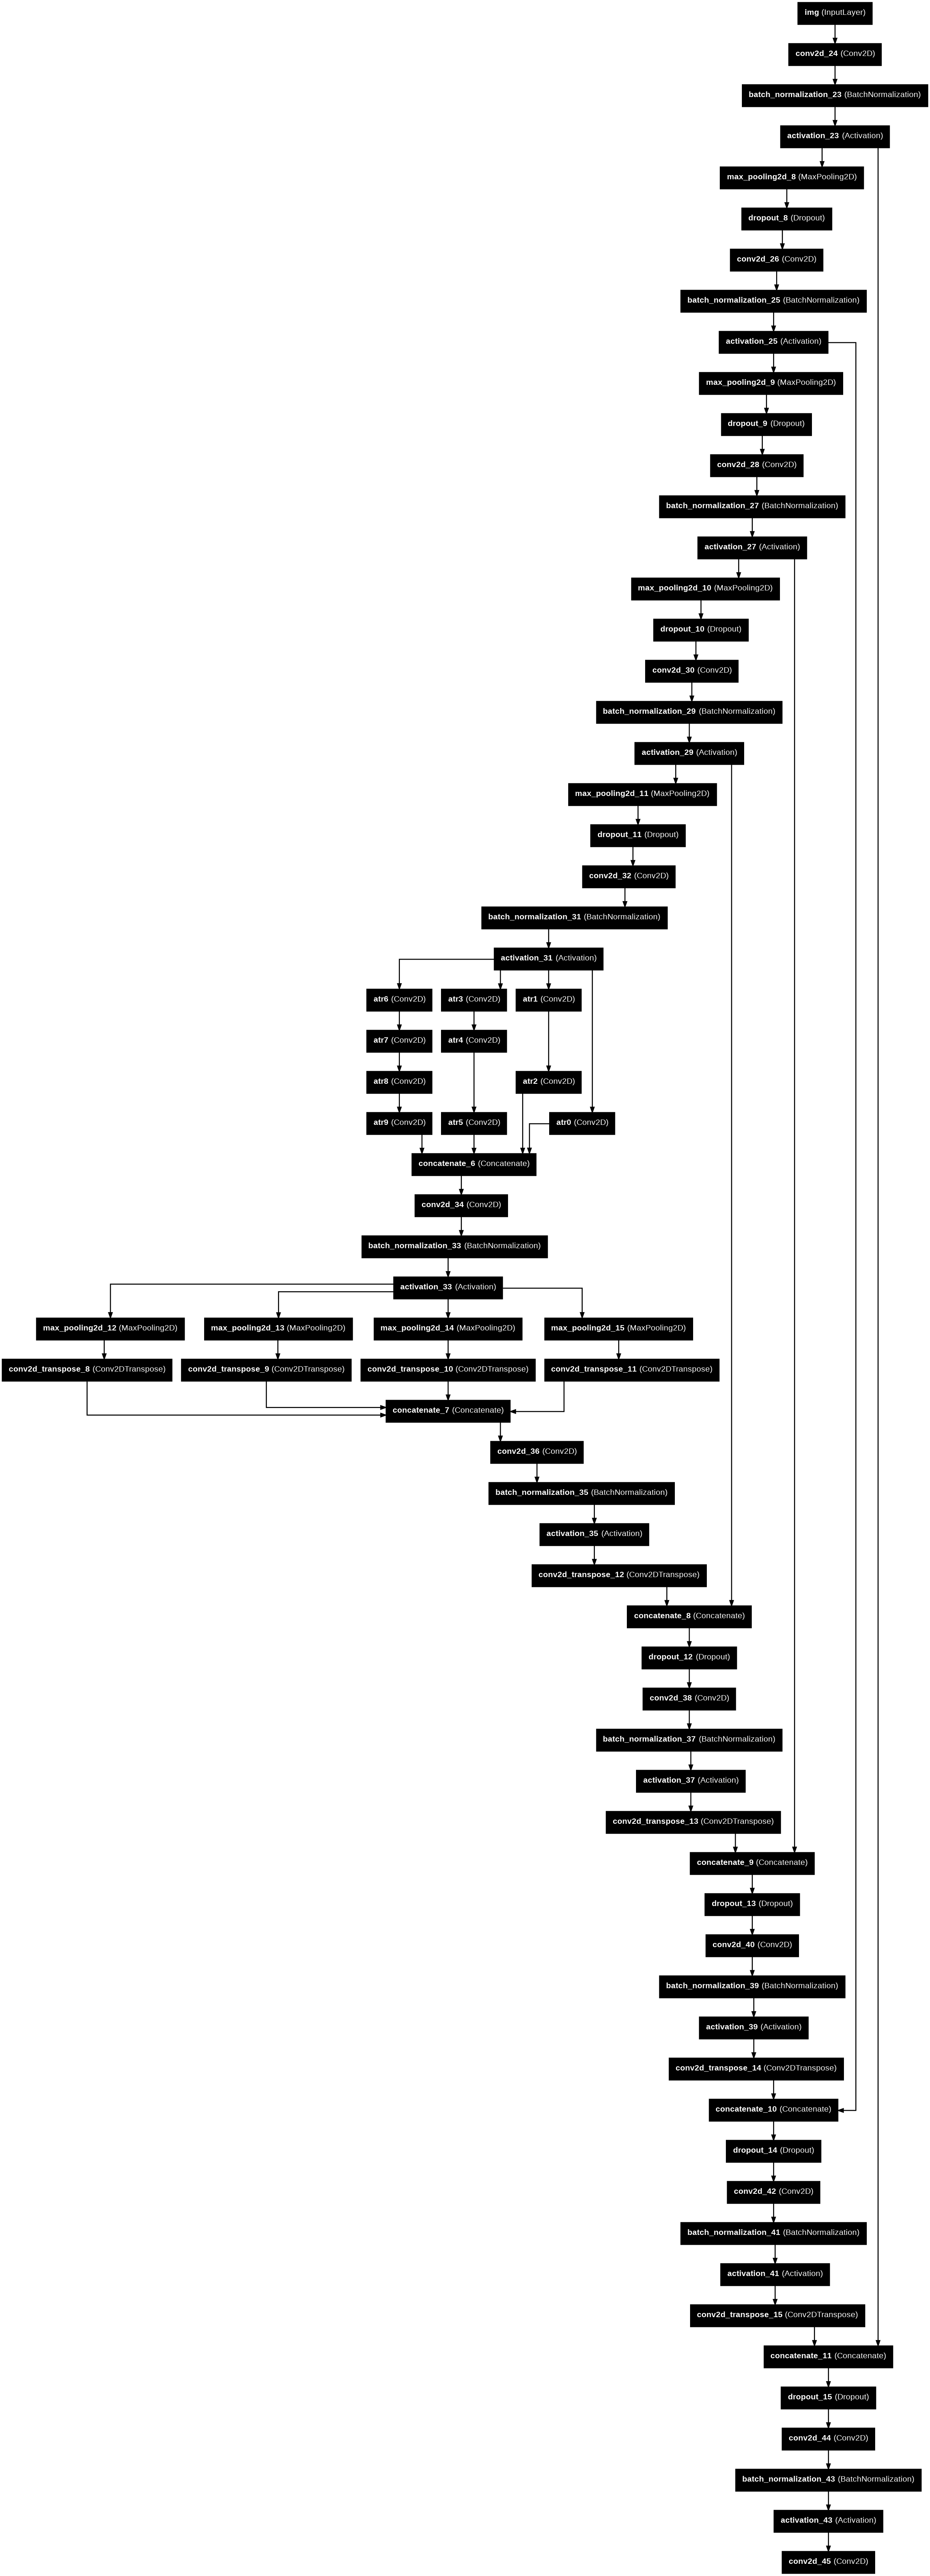

In [118]:
plot_model(model, to_file='/content/model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
result=model.fit(tr_image_generator,steps_per_epoch=64,epochs=45,validation_data=val_image_generator,validation_steps=64,callbacks=callbacks,initial_epoch=35)

In [126]:
model.load_weights('/content/best_model.h5')

model quantization

In [127]:
def classifier_generator(images):
    '''Construct a data generator using tf.Dataset to load only images'''
    image_string=tf.io.read_file(images)
    image = tfio.experimental.image.decode_tiff(image_string)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image

In [128]:
def train_generator(images,masks):
    '''Construct a data generator using tf.Dataset to load image+masks'''
    image_string=tf.io.read_file(images)
    image = tfio.experimental.image.decode_tiff(image_string)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    mask=tf.io.read_file(masks)
    mask = tfio.experimental.image.decode_tiff(mask)
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    mask = tf.image.resize(mask, [128, 128],method='nearest')
    return image,mask

In [129]:
def iou_coef(y_true, y_pred, smooth=1):
  '''This function calculates iou '''
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2])
  union = K.sum(y_true,[1,2])+K.sum(y_pred,[1,2])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth))
  return iou.numpy()

In [132]:
#loading image df
img=pd.read_csv('/content/dup_rem.csv')
df=pd.read_csv('/content/train_masks.csv')
img.drop('Unnamed: 0',axis=1,inplace=True)
img.image_name=img.image_name.astype(int)
img.subject_name=img.subject_name.astype(int)
img.columns=['image_path','img','subject','mask_path']
new_df=pd.merge(img,df,on=['img','subject'])
new_df.pixels.fillna(0,inplace=True)
val=[0 if i==0 else 1 for i in new_df.pixels]
new_df['mask_pres']=val
pos_df=new_df[new_df.mask_pres==1]

<ipython-input-132-2d1db6476ddf>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df.pixels.fillna(0,inplace=True)


In [133]:
X_train, X_valid, y_train, y_valid = train_test_split(new_df.image_path, new_df.mask_path, test_size=0.2, random_state=42)

In [ ]:
#loading the classifier model
model_clf = keras.models.load_model('/content/classfier_nerve')

In [ ]:
#loading the segmentor model
model=keras.models.load_model('/content/segmetnor',custom_objects={'categorical_crossentropy_plus_dice_loss':focal_loss,'iou_score':iou_score})

quantizing model

In [ ]:
#quantizing classifier model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/classfier_nerve')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quant_model_clf = converter.convert()
#quantizing segmentor model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/segmetnor')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quant_model = converter.convert()

saving quantized model as tflite file

In [ ]:
#saving the tflite file of classifier quantized model
f = open("quant_classifier.tflite", "wb")
f.write(quant_model_clf)
f.close()
#saving the tflite file of segmentor quantized model
f = open("quant_segmentor.tflite", "wb")
f.write(quant_model)
f.close()

In [ ]:
interpreter_clf = tf.lite.Interpreter(model_path="quant_classifier.tflite")
interpreter_clf.allocate_tensors()
interpreter_seg = tf.lite.Interpreter(model_path="quant_segmentor.tflite",num_threads=1)
interpreter_seg.allocate_tensors()

In [ ]:
test_image = tf.expand_dims(x_tes, axis=0)
test_image=tf.cast(test_image,tf.float32)

input_index = interpreter_clf.get_input_details()[0]["index"]
output_index = interpreter_clf.get_output_details()[0]["index"]

# input_index = interpreter_seg.get_input_details()[0]["index"]
# output_index = interpreter_seg.get_output_details()[0]["index"]

# interpreter_seg.set_tensor(input_index, test_image)
# interpreter_seg.invoke()
# predictions = interpreter_seg.get_tensor(output_index)

getting quantized using quantized classifier model

In [ ]:
#Getting the prediction on validation set ofafter quantized model
scores_val=[]
X_tr=np.zeros((len(X_valid),128,128,4),dtype=np.float32)
y_tr=np.zeros((len(y_valid),128,128,4),dtype=np.float32)
pred_val=np.zeros((len(y_valid),128,128,4),dtype=np.float32)
for i in range(len(X_valid)):
  image_cl=classifier_generator(X_valid.iloc[i])
  image_cl=tf.expand_dims(image_cl,0)
  image_cl=tf.cast(image_cl,tf.float32)
  interpreter_clf.set_tensor(input_index, image_cl)
  interpreter_clf.invoke()
  pred_clf = interpreter_clf.get_tensor(output_index)
  if pred_clf>=0.4:
    X_tr[i],y_tr[i]=train_generator(X_valid.iloc[i],y_valid.iloc[i])
    pred_seg=model.predict(tf.expand_dims(X_tr[i],0))
    pred_val[i]=pred_seg
    true=tf.expand_dims(y_tr[i],0)
    score=iou_coef(true,pred_seg)
    scores_val.append(score)
  else:
    X_tr[i],y_tr[i]=train_generator(X_valid.iloc[i],y_valid.iloc[i])
    pred_seg=np.zeros((1,128,128,4),dtype=np.float32)
    pred_val[i]=pred_seg
    true=tf.expand_dims(y_tr[i],0)
    score=iou_coef(true,pred_seg)
    scores_val.append(score)

prediction

In [ ]:
#Getting the prediction on validation set of before quantized model
scores_val_b=[]
X_tr=np.zeros((len(X_valid),128,128,4),dtype=np.float32)
y_tr=np.zeros((len(y_valid),128,128,4),dtype=np.float32)
pred_val_b=np.zeros((len(y_valid),128,128,4),dtype=np.float32)
for i in range(len(X_valid)):
  image_cl=classifier_generator(X_valid.iloc[i])
  image_cl=tf.expand_dims(image_cl,0)
  pred_clf=model_clf.predict(image_cl)
  if pred_clf>=0.4:
    X_tr[i],y_tr[i]=train_generator(X_valid.iloc[i],y_valid.iloc[i])
    pred_seg=model.predict(tf.expand_dims(X_tr[i],0))
    pred_val_b[i]=pred_seg
    true=tf.expand_dims(y_tr[i],0)
    score=iou_coef(true,pred_seg)
    scores_val_b.append(score)
  else:
    X_tr[i],y_tr[i]=train_generator(X_valid.iloc[i],y_valid.iloc[i])
    pred_seg=np.zeros((1,128,128,4),dtype=np.float32)
    pred_val_b[i]=pred_seg
    true=tf.expand_dims(y_tr[i],0)
    score=iou_coef(true,pred_seg)
    scores_val_b.append(score)

In [ ]:
print('Mean validation score before quantization= ',np.mean(scores_val_b))
print('Mean validation score after quantization= ',np.mean(scores_val))

In [ ]:
random_gen=[i for i in range(1080)]
for j in range(10):
  i=random.choice(random_gen)
  fig,ax=plt.subplots(1,4,figsize=(14,7))
  quer=classifier_generator(X_valid.iloc[i])
  ax[0].imshow(cv2.imread(X_valid.iloc[i],cv2.IMREAD_GRAYSCALE),cmap='gray')
  ax[0].set_title('Original')
  ax[1].imshow(cv2.imread(y_valid.iloc[i],cv2.IMREAD_GRAYSCALE),cmap='gray')
  ax[1].set_title('Original mask')
  ax[2].imshow(pred_val_b[i])
  ax[2].set_title('Before quantization predict')
  ax[3].imshow(pred_val[i])
  ax[3].set_title('After quantization predict')

In [ ]:
# https://www.geeksforgeeks.org/how-to-get-size-of-folder-using-python/
size = 0
# assign folder path
Folderpath = '/content/drive/MyDrive/classfier_nerve'
# get size
for path, dirs, files in os.walk(Folderpath):
    for f in files:
        fp = os.path.join(path, f)
        size += os.path.getsize(fp)

# display size
print("Pre quantization model size= " + str(size/(1024*1024)),'MB')

In [ ]:
# https://www.geeksforgeeks.org/how-to-get-size-of-folder-using-python/
size = 0
# assign folder path
Folderpath = '/content/drive/MyDrive/segmentor_nerve'
# get size
for path, dirs, files in os.walk(Folderpath):
    for f in files:
        fp = os.path.join(path, f)
        size += os.path.getsize(fp)

# display size
print("Pre quantization model size= " + str(size/(1024*1024)),'MB')

In [ ]:
print('Post quantization model size =',os.stat('quant_classifier.tflite').st_size/(1024*1024),'MB')

In [ ]:
print('Post quantization model size =',os.stat('quant_segmentor.tflite').st_size/(1024*1024),'MB')

In [ ]:
print('Reduction in classifier model size = {0:.1f} x'.format(248.40902/59.54229))
print('Reduction in segmentation model size = {0:.1f} x'.format(127.003455/60.41690))

In [ ]:
print('Reduction in validation iou score = {0:.3f}'.format(0.62266594-0.60848292))

streamLit Deployement

In [ ]:
!pip install q keras==2.4.1
!pip install segmentation_models
!pip install tensorflow_io

In [ ]:
!curl -LkO https://raw.githubusercontent.com/remoteit/installer/master/scripts/auto-install.sh
! chmod +x ./auto-install.sh
! sudo ./auto-install.sh

In [ ]:
! sudo connectd_installer

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import os
import numpy as np
import requests
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import streamlit as st
from tensorflow import keras
import tensorflow_io as tfio
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate,Dropout
from tensorflow.keras.layers import Multiply, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
import imgaug.augmenters as iaa
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet
focal_loss = sm.losses.cce_dice_loss

# st.set_option('deprecation.showfileuploaderEncoding',False)
st.title('Nerve segmentation web app')

@st.cache(allow_output_mutation=True)
def load_model():
  model_clf = keras.models.load_model('/content/drive/MyDrive/classfier_nerve')
  model=keras.models.load_model('/content/drive/MyDrive/segmetnor',custom_objects={'categorical_crossentropy_plus_dice_loss':focal_loss,'iou_score':iou_score})
  return model_clf,model

model_clf,model=load_model()

def classifier_generator(images):
    '''Construct a data generator using tf.Dataset to load only images'''
    # image_string=tf.io.read_file(images)
    image = tfio.experimental.image.decode_tiff(images)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image

def model_predict(img_path):

    flag=0
    img = classifier_generator(img_path)
    img=tf.expand_dims(img,0)
    pred_clf=model_clf.predict(img)
    if pred_clf >= 0.4:
      pred_seg=model.predict(img)
      flag=1
    else:
    	pred_seg=np.zeros((1,128,128,4),dtype=np.float32)

    return pred_seg,flag

up_file = st.file_uploader("Please upload an image file", type=["tif"])


if up_file is not None:
  fil_rd=Image.open(up_file)
  st.image(fil_rd, caption='Uploaded Image.', use_column_width=True)

  bytes_data = tf.convert_to_tensor(up_file.getvalue())
  # with st.spinner('Finding nerves...'):
  submit = st.button('Predict')
  if submit:
    img,_=model_predict(bytes_data)
    if _==1:
      st.success('Nerves found..')
      fig = plt.figure()
      ax = fig.add_subplot(1,1,1)
      ax.imshow(classifier_generator(bytes_data),cmap='gray')
      ax.imshow(img[0],alpha=0.7,interpolation='none')
      ax.contour(tf.argmax(img[0],axis=-1),colors='blue',levels=[0.5])
      ax.set_xticks([])
      ax.set_yticks([])
      st.write(fig)
    else:
      st.info('There are no nerves found in the image')

In [ ]:
!streamlit run --server.port 80 app.py --&>/dev/null&